# Analysing network traffic with Pandas

Dirk Loss, http://dirk-loss.de, @dloss. 



v1.1, 2013-06-02 (https://github.com/dloss/notebooks/blob/master/NetworkTraffic-Pandas.ipynb)

v2.0  2021-17-07 @geb

This IPython notebook shows how to analyse network traffic using the following tools:
    
* **Pandas**, a Python library for analysing data <http://pandas.pydata.org/>
* **tshark**, the command line version of the Wireshark sniffer <http://http://www.wireshark.org/>
* **Matplotlib**, a Python plotting library <http://matplotlib.org/>

Pandas allows for very flexible analysis, treating your PCAP files as a timeseries of packet data. 

So if the statistics provided by Wireshark are not enough, you might want to try this. And it's more fun, of course. :) 

## Get a PCAP file

In [5]:
!wget -O dummy.pcap https://www.wireshark.org/download/automated/captures/randpkt-2020-09-06-16170.pcap

--2021-08-15 23:01:44--  https://www.wireshark.org/download/automated/captures/randpkt-2020-09-06-16170.pcap
Resolving www.wireshark.org (www.wireshark.org)... 2606:4700:20::681a:af0, 2606:4700:20::ac43:4b27, 2606:4700:20::681a:bf0, ...
Connecting to www.wireshark.org (www.wireshark.org)|2606:4700:20::681a:af0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5098521 (4.9M) [application/vnd.tcpdump.pcap]
Saving to: ‘dummy.pcap’

dummy.pcap          100%[===================>]   4.86M  8.61MB/s    in 0.6s    

2021-08-15 23:01:45 (8.61 MB/s) - ‘dummy.pcap’ saved [5098521/5098521]



In [6]:
!ls

demo.ipynb  dummy.pcap	LRP.ipynb  obs	visu_tool.ipynb


In [7]:
pcap_file = 'dummy.pcap'

In [128]:
# set plotting inline
%pylab inline
# set fig size
figsize(12,12)

Populating the interactive namespace from numpy and matplotlib


## Convert PCAP to a CSV using tshark

In [8]:
!tshark -v

TShark (Wireshark) 2.6.20 (Git v2.6.20 packaged as 2.6.20-0+deb10u1)

Copyright 1998-2020 Gerald Combs <gerald@wireshark.org> and contributors.
License GPLv2+: GNU GPL version 2 or later <http://www.gnu.org/licenses/old-licenses/gpl-2.0.html>
This is free software; see the source for copying conditions. There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

Compiled (64-bit) with libpcap, with POSIX capabilities (Linux), with libnl 3,
with GLib 2.58.3, with zlib 1.2.11, with SMI 0.4.8, with c-ares 1.14.0, with Lua
5.2.4, with GnuTLS 3.6.7, with Gcrypt 1.8.4, with MIT Kerberos, with MaxMind DB
resolver, with nghttp2 1.36.0, with LZ4, with Snappy, with libxml2 2.9.4.

Running on Linux 4.19.0-17-amd64, with Intel(R) Core(TM) i5-6200U CPU @ 2.30GHz
(with SSE4.2), with 7861 MB of physical memory, with locale en_US.utf8, with
libpcap version 1.8.1, with GnuTLS 3.6.7, with Gcrypt 1.8.4, with zlib 1.2.11,
binary plugins supported (13 loaded).

Built using gcc 

For now, I just select the frame number and the frame length and redirect the output to a file:

In [13]:
import subprocess
import datetime
import pandas as pd

def pcap2dataframe(filename, fields=[], display_filter="",):
    """ Read PCAP file into Pandas DataFrame object. 
    Uses tshark command-line tool from Wireshark.

    filename:       Name or full path of the PCAP file to read
    fields:         List of fields to include as columns
    display_filter: Additional filter to restrict frames
    
    Syntax for fields and display_filter is specified in
    Wireshark's Display Filter Reference:
 
      http://www.wireshark.org/docs/dfref/
    """
    fieldspec = " ".join("-e %s" % f for f in fields)

    display_filters = []
    if display_filter:
        display_filters.append(display_filter)
    filterspec = "-Y '%s'" % " and ".join(f for f in display_filters)

    options = "-r %s -n -T fields -Eheader=y" % filename
    cmd = "tshark %s %s %s" % (options, filterspec, fieldspec)
    proc = subprocess.Popen(cmd, shell = True, 
                                 stdout=subprocess.PIPE)
    
    return pd.read_table(proc.stdout)

# pcap plots

In [29]:
import pandas as pd

### Voerde

In [132]:
train_df = pd.read_table("../data/voerde/inspect/cleaned.data")
eval_df = pd.read_table("../data/voerde/inspect/cleaned_eval.data")

train_df['len'].describe().apply(lambda x: format(x, 'f'))
print(11)
eval_df['len'].describe().apply(lambda x: format(x, 'f'))

11


count    1518761.000000
mean         477.828074
std         1228.064286
min           60.000000
25%           66.000000
50%           92.000000
75%          288.000000
max        33132.000000
Name: len, dtype: object

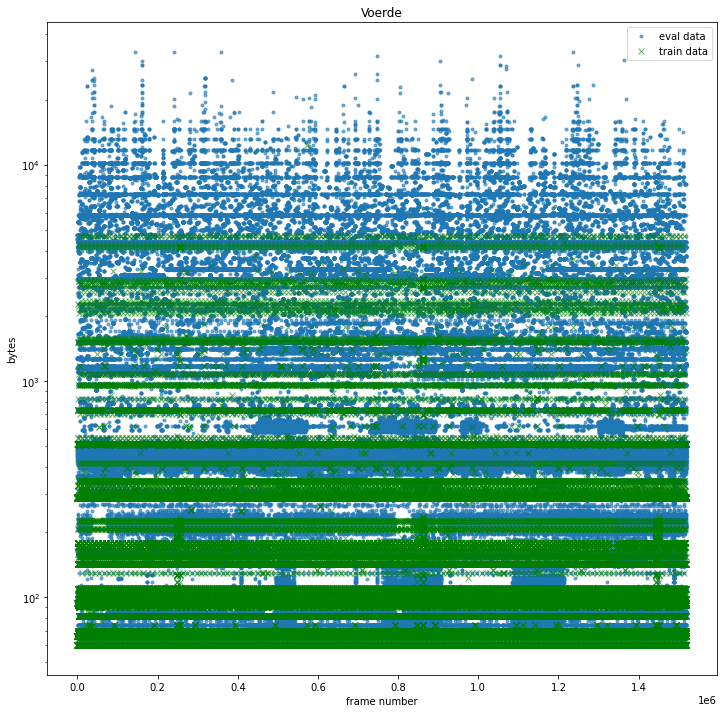

In [129]:
# mixing traing and eval plot
new = pd.DataFrame([])
new['eval'] = eval_df['len']
new['train'] = train_df['len']
ax = new.plot(style=['.','gx'], alpha=.6,logy=True)
ax.set_title("Voerde")
ax.set_ylabel("# bytes")
ax.set_xlabel("frame number")
ax.legend(['eval data', 'train data'], loc='upper right')
del new

### SWAT

In [ ]:
train_df = pd.read_table("../data/voerde/inspect/cleaned.data")
eval_df = pd.read_table("../data/voerde/inspect/cleaned_eval.data")

# mixing traing and eval plot
new = pd.DataFrame([])
new['eval'] = eval_df['len']
new['train'] = train_df['len']
ax = new.plot(style=['.','gx'], alpha=.6,logy=True)
ax.set_title("SWAT A6")
ax.set_ylabel("bytes")
ax.set_xlabel("frame number")
ax.legend(['eval data - pcap 10', 'train data - pcap 7'], loc='upper right')
del new

/usr/lib/python3/dist-packages/IPython/core/events.py:74: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:131: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


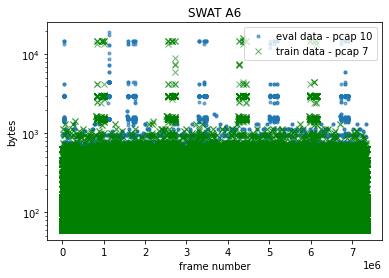

## plot confusion matrix

In [ ]:
def convert_from_raw(path_):
    # in FP.txt
    # out DataFrame
    org = pd.read_table(path_,names=['PID'])
    case = path_.split('/')[-1].split('.txt')[0]
    org[case]=5000
    
    if org.shape[0] == 0:
        df = pd.DataFrame(columns=['PID',case, 'FID'])
        df[case] = df[case].astype('int64')
        return df[['PID', 'FID', df.columns[1]]]
    org[['FID', 'PID']] = org['PID'].str.split(" \[", n = 1,expand=True)
    org['PID'] = org['PID'].str.replace(r'\]', '')
    df = org['PID'].str.split(',', expand=True).stack()
    df = pd.DataFrame(df.astype('int64')).reset_index()
    df = df.join(org,on=df.level_0).drop(['level_0','level_1','PID'],axis=1).rename(columns={0:'PID'})
    df['PID'] = df['PID'].astype('int64')
    df['FID'] = df['FID'].astype('int64')
    df[df.columns[1]] = df[df.columns[1]].astype('int64')
    return df[['PID', 'FID', df.columns[1]]]

In [48]:
ano_pidsFP = convert_from_raw("../src/runs/logs/ano_pids_SWAT_eval_byte_debug_AAAA_IsolationForest/FP.txt")
ano_pidsFN = convert_from_raw("../src/runs/logs/ano_pids_SWAT_eval_byte_debug_AAAA_IsolationForest/FN.txt")
ano_pidsTP = convert_from_raw("../src/runs/logs/ano_pids_SWAT_eval_byte_debug_AAAA_IsolationForest/TP.txt")

In [6]:
mix = ano_pidsFP.append(ano_pidsTP)#.append(ano_pidsFN)
mix.index = mix.index.astype('int64', copy = False)
mix = mix.fillna(0)
mix['PID'] = mix['PID'].astype('int64')
mix['FID'] = mix['FID'].astype('int64')
mix['TP'] = mix['TP'].astype('int64')
#mix['FN'] = mix['FN'].astype('int64')
mix['FP'] = mix['FP'].astype('int64')
mix = mix.set_index('PID')

In [7]:
m=pd.DataFrame(range(7_350_000)) #100
m=m.rename(columns={0:'PID'}).set_index('PID')
#m['TN'] = 100
#cm = m.join(mix).fillna(0)#,lsuffix='', rsuffix='PID')#.drop(['TNPID'],axis=1)
mix = m.join(mix,lsuffix='', rsuffix='PID').fillna(0)#.drop(['TNPID'],axis=1)
del m
# reset TN 
#cm.iloc[cm[cm['FID']!=0].index,0] = 0

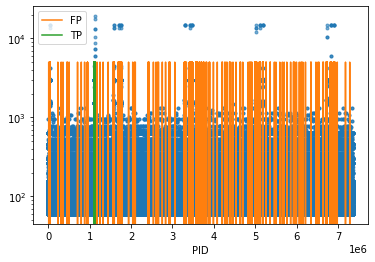

In [8]:
ax = eval_df['frame.len'].plot(style=".", alpha=0.6, logy=True)
ax = mix[['FP', 'TP']].plot(ax=ax)

In [ ]:
from sys import path as spath
spath.append(f"{spath[1].split('/pcaps')[0]}/src/")
import lib.H5Dataset as H5D

dummy = H5D.H5Dataset("/home/geb/Workspace/gits/thesis/src/SWAT/train_byte_debug/train_pcap.hdf5", train=False, n_frames_input=1, n_frames_output=0, do_norm=False, shape=(32, 32))
data, _ = dummy.convert_to_numpy()
w = data.shape[0]
h = data.shape[1]
data = pd.DataFrame(data.reshape(w*h,))

ax = data.plot.bar()
ax.set_title("byte distribution over time")
ax.set_ylabel("bytes")
ax.set_xlabel("packet")
ax.set_xticks([x/h+1 for x in (range(0,w*h,h))])